### 实验二 线性回归

> 单元和多元回归
>
> numpy pandas matplotlib scikit-learn
>
> MSE R**2（评估）

#### 简单线性回归

In [58]:
import numpy as np
import matplotlib.pyplot as plt

#生成特征x(100个样本，范围0-10)
x = np.linspace(0, 10, 100).reshape(-1, 1)

print(x.shape)

(100, 1)


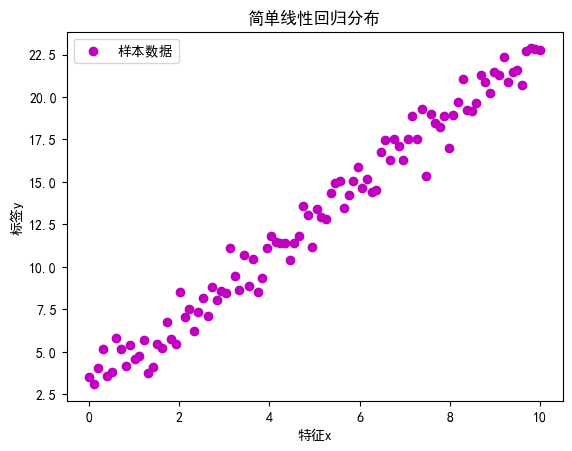

In [21]:
# 生成标签（加入误差-噪声）
np.random.seed(42) #随机种子
y = 2 * x + 3 + np.random.normal(0 ,1, size = x.shape) #噪声均值0，标准差1

plt.rcParams['font.sans-serif'] = ['SimHei']
plt.scatter(x, y, color = 'm', label = '样本数据')
plt.xlabel('特征x')
plt.ylabel('标签y')
plt.title('简单线性回归分布')
plt.legend()
plt.show()

In [22]:
# 模型构建与训练
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

#划分训练集(80%)和测试集(20%)
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 42)
print(x_train.shape, x_test.shape)

(80, 1) (20, 1)


In [24]:
# 初始化model
model = LinearRegression()
# 训练(拟合)
model.fit(x_train, y_train)

# 输出训练得到的参数
print(f'简单线性回归参数: ')
print(f'系数 w: {model.coef_[0][0]:.4f}')  # 真实 w = 2
print(f'截距 b: {model.intercept_[0]:.4f}') # 真实 b = 3

简单线性回归参数: 
系数 w: 2.0121
截距 b: 2.8198


In [25]:
# 模型评估
from sklearn.metrics import mean_squared_error, r2_score
# 预测
y_pred = model.predict(x_test)

print(f'简单线性回归评估指数：')

# 计算均方误差MSE
mse = mean_squared_error(y_test, y_pred)
print(f'测试集均方误差 MSE: {mse:.4f}')

# 计算R^2
r2 = r2_score(y_test, y_pred)
print(f'测试集决定系数 R^2: {r2:.4f}')

简单线性回归评估指数：
测试集均方误差 MSE: 0.6220
测试集决定系数 R^2: 0.9818


##### 结果可视化

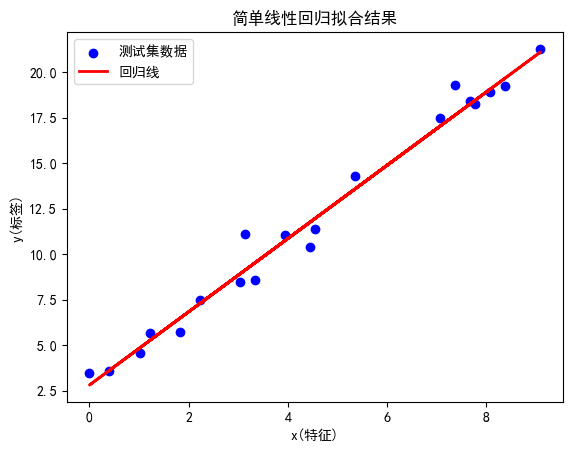

In [29]:
plt.scatter(x_test, y_test, color = 'b', label = '测试集数据')
plt.plot(x_test, y_pred, color = 'r', linewidth = 2, label = '回归线')
plt.xlabel('x(特征)')
plt.ylabel('y(标签)')
plt.title('简单线性回归拟合结果')
plt.legend()
plt.show()

#### 多元线性回归

> 真实模型，含有三个特征的多元线性回归

![](./img/1.png)

In [59]:
# 生成三个特征（1000个样本）
np.random.seed(42)
x_multi = np.random.rand(1000, 3) #3个特征

#真实参数
w_true = [1.5, 0.8, -2.3]
b_true = 5

#生成标签（加入噪声）
y_multi = x_multi @ w_true + b_true + np.random.normal(0, 0.5, size = 1000) #@表示矩阵乘法

print(x_multi.shape) 
print(y_multi.shape)

(1000, 3)
(1000,)


> 模型构建，训练与评估

In [55]:
x_train_m, x_test_m, y_train_m, y_test_m = train_test_split(x_multi, y_multi, test_size = 0.4, random_state = 42)

#初始化并训练多元线性回归模型
model_m = LinearRegression()
model_m.fit(x_train_m, y_train_m)

print(f'多元线性回归参数: ')
print(f'系数 w: {model_m.coef_} (真实值：{w_true})')
print(f'截距 b: {model_m.intercept_:.4f} (真实值：{b_true})') 

多元线性回归参数: 
系数 w: [ 1.47549404  0.80480017 -2.41054863] (真实值：[1.5, 0.8, -2.3])
截距 b: 5.0689 (真实值：5)


In [56]:
# 评估
y_pred_m = model_m.predict(x_test_m)

mse_m = mean_squared_error(y_test_m, y_pred_m)
r2_m = r2_score(y_test_m, y_pred_m)

print(f'多元线性回归评估指数：')
print(f'测试集均方误差 MSE: {mse_m:.4f}')
print(f'测试集决定系数 R^2: {r2_m:.4f}')

多元线性回归评估指数：
测试集均方误差 MSE: 0.2374
测试集决定系数 R^2: 0.7306
